In [2]:
##house price prediction
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [222]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
#load dataset
df1 = pd.read_csv('Bengaluru_House_Data 2.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [227]:
print(df1.shape)
print(df1.info())

(13320, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
None


In [228]:
df1['area_type']

0        Super built-up  Area
1                  Plot  Area
2              Built-up  Area
3        Super built-up  Area
4        Super built-up  Area
                 ...         
13315          Built-up  Area
13316    Super built-up  Area
13317          Built-up  Area
13318    Super built-up  Area
13319    Super built-up  Area
Name: area_type, Length: 13320, dtype: object

In [229]:
df1['price'].describe()

count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

In [230]:
df1['price'] = df1['price'].str.replace(r'[-+\d.]','').astype(float)

AttributeError: Can only use .str accessor with string values!

In [6]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df1.groupby('availability')['availability'].agg('count')

availability
14-Jul                      1
14-Nov                      1
15-Aug                      1
15-Dec                      1
15-Jun                      1
                        ...  
22-Mar                      3
22-May                     10
22-Nov                      2
Immediate Possession       16
Ready To Move           10581
Name: availability, Length: 81, dtype: int64

In [8]:
df1.groupby('location')['location'].agg('count')

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1305, dtype: int64

In [9]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')

In [10]:
df1.groupby('society')['society'].agg('count')

society
3Codeli    2
7 ise P    1
A idse     2
A rtsai    1
ACersd     1
          ..
Zonce E    2
Zostaa     3
i1ncyRe    1
i1odsne    1
i1rtsCo    3
Name: society, Length: 2688, dtype: int64

In [11]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [12]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
df3.shape

(13246, 5)

In [15]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
df3.describe()

,bath,price
count,13246.000000,13246.000000
mean,2.692586,112.389392
std,1.341506,149.076587
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
dtypes: float64(2), object(3)
memory usage: 620.9+ KB


In [18]:
df3['bhk'] = df3['size'].str.split().str.get(0).astype(int)

/var/folders/88/wb91xyx52873d36958kg6w6h0000gn/T/ipykernel_3179/3876055706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].str.split().str.get(0).astype(int)


In [19]:
df3

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [20]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [21]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [22]:
def convertRange(x):

    temp = x.split('-')
    if len(temp)==2:
        return (float(temp[0]) + float(temp[1]))/2
    
    try:
        return float(x)
    
    except:
        return None

In [23]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [24]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


#price_per_sqft

In [25]:
df3['total_sqft'] = pd.to_numeric(df3['total_sqft'],errors='coerce')
df3['price_per_sqft'] = df3['price']*100000 / df3['total_sqft']

/var/folders/88/wb91xyx52873d36958kg6w6h0000gn/T/ipykernel_3179/3318990150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['total_sqft'] = pd.to_numeric(df3['total_sqft'],errors='coerce')
/var/folders/88/wb91xyx52873d36958kg6w6h0000gn/T/ipykernel_3179/3318990150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['price_per_sqft'] = df3['price']*100000 / df3['total_sqft']


In [26]:
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [27]:
df3.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13056.000000,13246.000000,13246.000000,13246.000000,1.305600e+04
mean,1554.458192,2.692586,112.389392,2.801902,7.952593e+03
std,1238.479835,1.341506,149.076587,1.295758,1.073136e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266434e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.454545e+03
75%,1670.000000,3.000000,120.000000,3.000000,7.340052e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [28]:
df3['location'].value_counts()

##we will remomve the location which is less than 10 times


location
Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: count, Length: 1304, dtype: int64

In [29]:
df3['location'] = df3['location'].apply(lambda x: x.strip())
location_count = df3['location'].value_counts()
location_count

/var/folders/88/wb91xyx52873d36958kg6w6h0000gn/T/ipykernel_3179/3935899777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['location'] = df3['location'].apply(lambda x: x.strip())


location
Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: count, Length: 1293, dtype: int64

In [30]:
location_count_less_10 = location_count[location_count<10]
location_count_less_10

location
2nd Phase JP Nagar                9
KUDLU MAIN ROAD                   9
4th Block Koramangala             9
Vignana Nagar                     9
Ejipura                           9
                                 ..
Vasantapura main road             1
Bapuji Layout                     1
1st Stage Radha Krishna Layout    1
BEML Layout 5th stage             1
Abshot Layout                     1
Name: count, Length: 1039, dtype: int64

In [31]:
location_count_less_10


location
2nd Phase JP Nagar                9
KUDLU MAIN ROAD                   9
4th Block Koramangala             9
Vignana Nagar                     9
Ejipura                           9
                                 ..
Vasantapura main road             1
Bapuji Layout                     1
1st Stage Radha Krishna Layout    1
BEML Layout 5th stage             1
Abshot Layout                     1
Name: count, Length: 1039, dtype: int64

In [32]:
df3['location'] = df3['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

/var/folders/88/wb91xyx52873d36958kg6w6h0000gn/T/ipykernel_3179/1638481699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['location'] = df3['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)


In [33]:
df3['location'].value_counts()

location
other                  2751
Whitefield              535
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          266
                       ... 
BTM 1st Stage            10
Basapura                 10
Sector 1 HSR Layout      10
Kalkere                  10
Nagadevanahalli          10
Name: count, Length: 255, dtype: int64

##outliers detection and removal

In [34]:
df3.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13056.000000,13246.000000,13246.000000,13246.000000,1.305600e+04
mean,1554.458192,2.692586,112.389392,2.801902,7.952593e+03
std,1238.479835,1.341506,149.076587,1.295758,1.073136e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266434e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.454545e+03
75%,1670.000000,3.000000,120.000000,3.000000,7.340052e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [35]:
(df3['total_sqft']/df3['bhk']).describe()

count    13056.000000
mean       572.904171
std        389.662389
min          0.250000
25%        471.666667
50%        551.000000
75%        625.000000
max      26136.000000
dtype: float64

In [36]:
##we will remove now the flats which are having less than 300sqft of area in 1 bhk

In [37]:
df3 = df3[((df3['total_sqft']/df3['bhk']))>=300]

In [38]:
df3['total_sqft'].describe()

count    12312.000000
mean      1589.702335
std       1261.895153
min        300.000000
25%       1118.000000
50%       1300.000000
75%       1700.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [39]:
df3.describe()

##we can see now the total no of count (reduction)

,total_sqft,bath,price,bhk,price_per_sqft
count,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000
mean,1589.702335,2.562135,111.421129,2.651966,6323.403514
std,1261.895153,1.073093,152.771439,0.973438,4187.211055
min,300.000000,1.000000,9.000000,1.000000,267.829813
25%,1118.000000,2.000000,49.382500,2.000000,4208.545855
50%,1300.000000,2.000000,70.000000,3.000000,5300.000000
75%,1700.000000,3.000000,115.000000,3.000000,6938.987948
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [40]:
def remove_outliers_sqft(df3):
    df_output = pd.DataFrame()
    for key, subdf in df3.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)

        gen_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft<= (m+st))]
        df_output = pd.concat([df_output,gen_df],ignore_index=True)
    return df_output
df3 = remove_outliers_sqft(df3)
df3.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000
mean,1503.836227,2.474407,91.493127,2.575296,5679.429874
std,875.803444,0.979752,88.184585,0.896051,2301.535335
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4248.789744
50%,1284.500000,2.000000,67.000000,2.000000,5188.679245
75%,1650.000000,3.000000,100.000000,3.000000,6453.365594
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [41]:
df3.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000
mean,1503.836227,2.474407,91.493127,2.575296,5679.429874
std,875.803444,0.979752,88.184585,0.896051,2301.535335
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4248.789744
50%,1284.500000,2.000000,67.000000,2.000000,5188.679245
75%,1650.000000,3.000000,100.000000,3.000000,6453.365594
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [42]:
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [221]:
df3.shape

(36, 5)

In [44]:
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10115,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10116,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10117,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10118,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [45]:
def remove_outliers_bhk(df3):
    exclude_indices = np.array([])
    for location,location_df3 in df3.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df3.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        print(location,bhk_stats)    
        
        # for bhk, bhk_df in df3.groupby('bhk'):
        #     stats = bhk_stats.get(bhk-1)
        #     if stats and stats['count']>5:
        #         exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df3.drop(exclude_indices,axis='index')

In [46]:
df3 = remove_outliers_bhk(df3)
remove_outliers_bhk(df3).value_counts().sum()

1st Block Jayanagar {2: {'mean': 11983.805668016194, 'std': 0.0, 'count': 1}, 3: {'mean': 11756.16905248807, 'std': 701.6243657657865, 'count': 3}, 4: {'mean': 15018.711280365416, 'std': 1.2278182423353805, 'count': 3}}
1st Block Koramangala {2: {'mean': 7695.065329936724, 'std': 78.78626016928274, 'count': 2}, 3: {'mean': 8936.170212765957, 'std': 0.0, 'count': 1}, 4: {'mean': 13333.333333333334, 'std': 3333.333333333334, 'count': 2}}
1st Phase JP Nagar {1: {'mean': 5952.380952380952, 'std': 0.0, 'count': 1}, 2: {'mean': 7931.806799837383, 'std': 1534.1422783514056, 'count': 8}, 3: {'mean': 9151.192151725822, 'std': 1054.731726021645, 'count': 7}, 4: {'mean': 7537.92218148637, 'std': 1607.0591069513537, 'count': 3}, 5: {'mean': 5666.666666666667, 'std': 0.0, 'count': 1}}
2nd Phase Judicial Layout {2: {'mean': 3851.8518518518517, 'std': 497.593660834978, 'count': 3}, 3: {'mean': 3620.93991671624, 'std': 241.87983343248052, 'count': 5}}
2nd Stage Nagarbhavi {4: {'mean': 15891.2037037037

10120

In [47]:
df3 = remove_outliers_bhk(df3)

1st Block Jayanagar {2: {'mean': 11983.805668016194, 'std': 0.0, 'count': 1}, 3: {'mean': 11756.16905248807, 'std': 701.6243657657865, 'count': 3}, 4: {'mean': 15018.711280365416, 'std': 1.2278182423353805, 'count': 3}}
1st Block Koramangala {2: {'mean': 7695.065329936724, 'std': 78.78626016928274, 'count': 2}, 3: {'mean': 8936.170212765957, 'std': 0.0, 'count': 1}, 4: {'mean': 13333.333333333334, 'std': 3333.333333333334, 'count': 2}}
1st Phase JP Nagar {1: {'mean': 5952.380952380952, 'std': 0.0, 'count': 1}, 2: {'mean': 7931.806799837383, 'std': 1534.1422783514056, 'count': 8}, 3: {'mean': 9151.192151725822, 'std': 1054.731726021645, 'count': 7}, 4: {'mean': 7537.92218148637, 'std': 1607.0591069513537, 'count': 3}, 5: {'mean': 5666.666666666667, 'std': 0.0, 'count': 1}}
2nd Phase Judicial Layout {2: {'mean': 3851.8518518518517, 'std': 497.593660834978, 'count': 3}, 3: {'mean': 3620.93991671624, 'std': 241.87983343248052, 'count': 5}}
2nd Stage Nagarbhavi {4: {'mean': 15891.2037037037

In [48]:
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10115,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10116,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10117,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10118,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [49]:
##here we use price per sqfft only for remove outliers 
##once we remove outliers we can remove the price per sqft column

In [50]:
df3.drop(columns=['size','price_per_sqft'],inplace=True)

In [51]:
df3.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [52]:
df3.to_csv('cleaned_data_house_prediction.csv')

In [53]:
X = df3.drop(columns=['price'])
y = df3['price']

In [54]:
X

,location,total_sqft,bath,bhk
0,1st Block Jayanagar,2850.0,4.0,4
1,1st Block Jayanagar,1630.0,3.0,3
2,1st Block Jayanagar,1875.0,2.0,3
3,1st Block Jayanagar,1200.0,2.0,3
4,1st Block Jayanagar,1235.0,2.0,2
...,...,...,...,...
10115,other,1353.0,2.0,2
10116,other,812.0,1.0,1
10117,other,1440.0,2.0,3
10118,other,1075.0,2.0,2


In [55]:
y

0        428.00
1        194.00
2        235.00
3        130.00
4        148.00
          ...  
10115    110.00
10116     26.00
10117     63.93
10118     48.00
10119    400.00
Name: price, Length: 10120, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [58]:
print(X_train.shape)

(8096, 4)


In [59]:
print(X_test.shape)

(2024, 4)


In [60]:
##applying linear regression

In [61]:
columns_trans = make_column_transformer((OneHotEncoder(),['location']),remainder='passthrough')

In [62]:
scaler = StandardScaler(with_mean=False)

In [63]:
lr = LinearRegression()

In [64]:
pipe = make_pipeline(columns_trans,scaler,lr)

In [65]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [66]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [67]:
y_pred_lr = pipe.predict(X_test)

In [68]:
y_pred_lr

array([ 58.42178067,  49.57411813,  65.92213352, ...,  74.37427287,
       122.35068713, 103.69917045])

In [69]:
r2_score(y_test,y_pred_lr)
print(r2_score(y_test,y_pred_lr))
print(mean_absolute_error(y_test,y_pred_lr))
print(mean_squared_error(y_test,y_pred_lr))


0.7396603174724935
20.065995967490277
2126.081265438533


In [70]:
ElasticNet = ElasticNet()
pipe_elastic  = make_pipeline(columns_trans,scaler,ElasticNet)
pipe_elastic

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('elasticnet', ElasticNet())])

In [71]:
pipe_elastic.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('elasticnet', ElasticNet())])

In [72]:
y_pred_elastic = pipe_elastic.predict(X_test)

In [73]:
y_pred_elastic

array([ 78.15000938,  73.46748159,  66.20263096, ...,  71.48106853,
       111.47091848, 112.38799364])

In [74]:
print(r2_score(y_test,y_pred_elastic))
print(mean_absolute_error(y_test,y_pred_elastic))
print(mean_squared_error(y_test,y_pred_elastic))


0.6440833446660678
23.870309815896352
2906.6169460472706


In [231]:
df3['price'].describe()

count      36.000000
mean      690.527778
std       539.678819
min       104.000000
25%       397.500000
50%       550.000000
75%       740.000000
max      2200.000000
Name: price, dtype: float64

In [75]:
##applying lasso regression

In [76]:
lasso = Lasso()

In [77]:
pipe_lasso = make_pipeline(columns_trans,scaler,lasso)

In [78]:
pipe_lasso

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('lasso', Lasso())])

In [79]:
pipe_lasso.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('lasso', Lasso())])

In [80]:
y_pred_lasso = pipe_lasso.predict(X_test)

In [81]:
y_pred_lasso

array([ 69.58851184,  65.13531709,  60.50212629, ...,  70.18340445,
       111.23501056, 118.07145423])

In [82]:
r2_score(y_test,y_pred_lasso)
print(r2_score(y_test,y_pred_lasso))
print(mean_absolute_error(y_test,y_pred_lasso))
print(mean_squared_error(y_test,y_pred_lasso))


0.7276491412498811
21.665101339653045
2224.1713318273887


In [83]:
##applying ridge 

In [84]:
ridge = Ridge()

In [85]:
pipe_ridge = make_pipeline(columns_trans,scaler,ridge)

In [86]:
pipe_ridge.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('ridge', Ridge())])

In [87]:
y_pred_ridge = pipe_ridge.predict(X_test)

In [88]:
y_pred_ridge

array([ 58.42899039,  49.58454276,  65.92071444, ...,  74.37224291,
       122.34432472, 103.69704312])

In [89]:
r2_score(y_test,y_pred_ridge)
print(r2_score(y_test,y_pred_ridge))
print(mean_absolute_error(y_test,y_pred_ridge))
print(mean_squared_error(y_test,y_pred_ridge))


0.7396363582604712
20.066267450663073
2126.276929930864


In [90]:
import pickle

In [91]:
pickle.dump(pipe_ridge,open('RidgeModel.pkl','wb'))

In [92]:
from sklearn.tree import DecisionTreeRegressor

In [93]:
model = DecisionTreeRegressor()

In [94]:
pipe_decision_tree = make_pipeline(columns_trans,scaler,model)

In [95]:
pipe_decision_tree.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [96]:
y_pred_decision_tree = pipe_decision_tree.predict(X_test)

In [97]:
y_pred_decision_tree

array([ 50.   ,  65.   ,  48.   , ...,  67.04 , 130.   ,  98.845])

In [98]:
r2_score(y_test,y_pred_decision_tree)

0.6192263634517506

In [99]:
## Model Training

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [100]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square


In [101]:
df3 = df3[(df3['total_sqft'])>=6000]

In [102]:
#starting of graphs

In [103]:
import seaborn as sns
sns.set(color_codes=True)

/var/folders/88/wb91xyx52873d36958kg6w6h0000gn/T/ipykernel_3179/268791205.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['bath'])


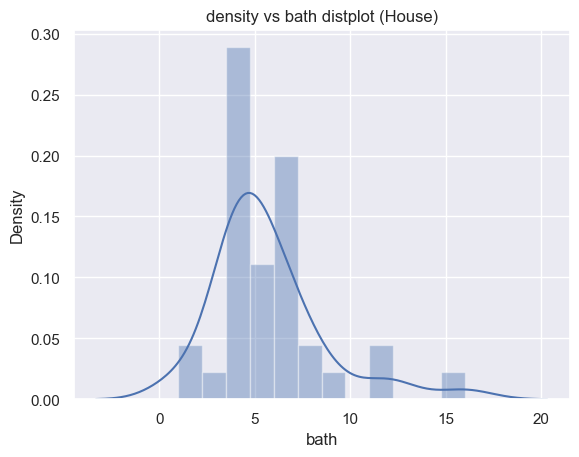

In [104]:
sns.distplot(df3['bath'])
plt.title('density vs bath distplot (House)')
plt.show()


/var/folders/88/wb91xyx52873d36958kg6w6h0000gn/T/ipykernel_3179/605343978.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['price'])


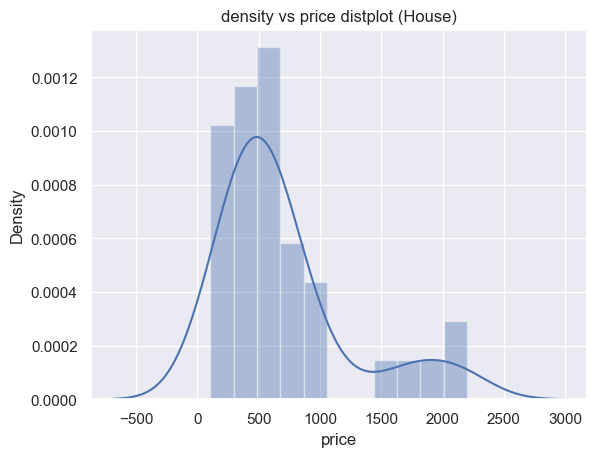

In [105]:
sns.distplot(df3['price'])
plt.title('density vs price distplot (House)')
plt.show()


/var/folders/88/wb91xyx52873d36958kg6w6h0000gn/T/ipykernel_3179/999032882.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['bhk'])


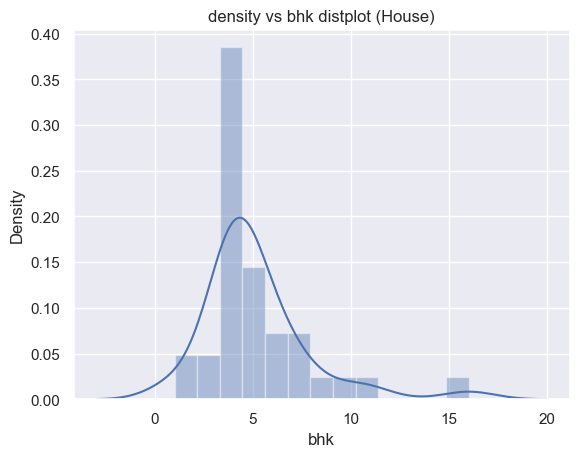

In [106]:
sns.distplot(df3['bhk'])
plt.title('density vs bhk distplot (House)')
plt.show()

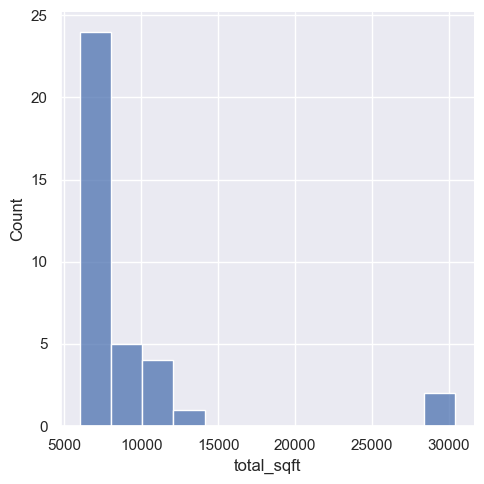

In [107]:
sns.displot(df3['total_sqft'])
##displot = histogram

In [108]:
import matplotlib.pyplot as plt

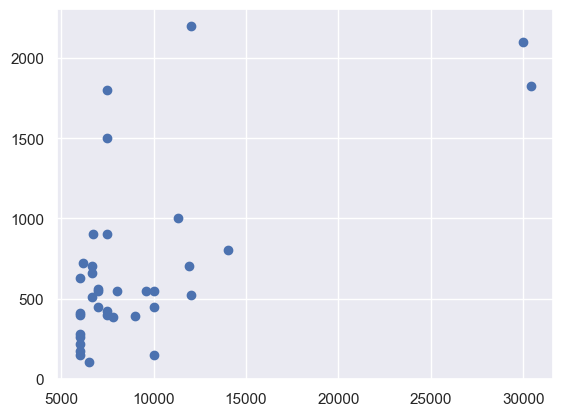

In [109]:
x = df3['total_sqft']
y = df3['price']
plt.scatter(x,y)

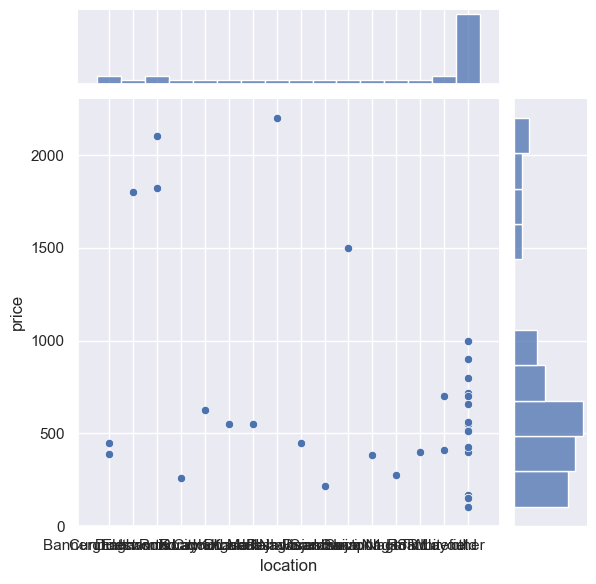

In [110]:
sns.jointplot(x = 'location', y='price' , data=df3)

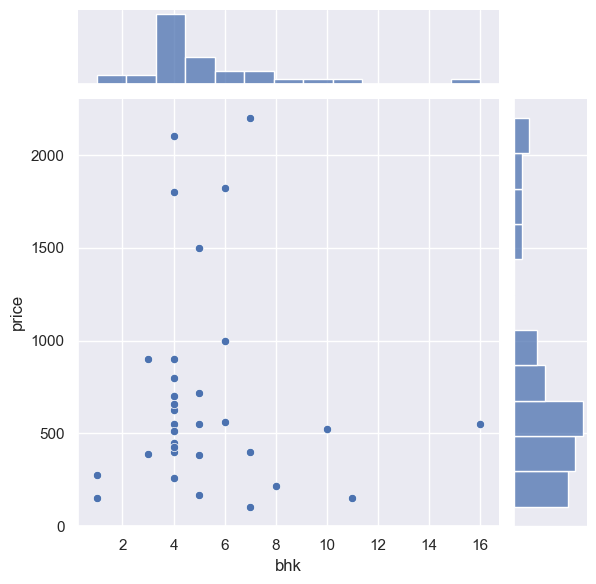

In [111]:
sns.jointplot(x = 'bhk', y='price' , data=df3)

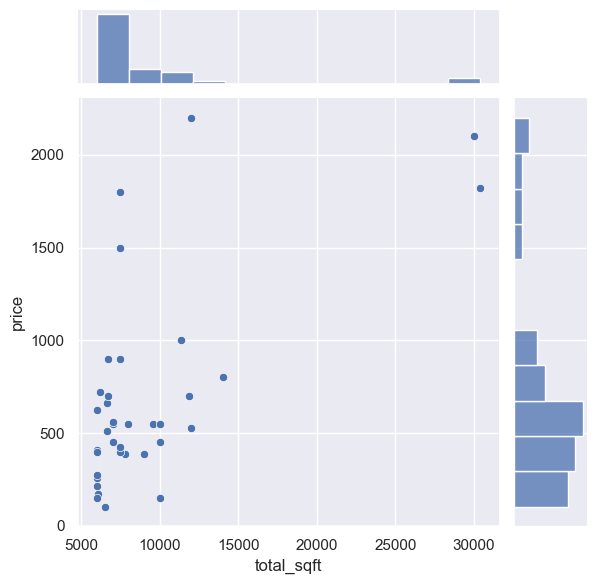

In [112]:
sns.jointplot(x = 'total_sqft', y='price' , data=df3)

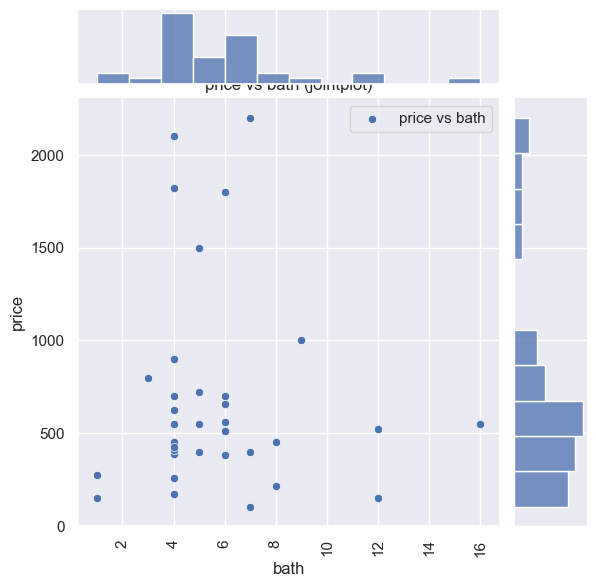

In [113]:
palette = sns.color_palette("Set1", n_colors=4)
sns.jointplot(x = 'bath', y='price' ,label = 'price vs bath', palette=palette,data=df3)
plt.xticks(rotation=90)
plt.title('price vs bath (jointplot)')
plt.show()

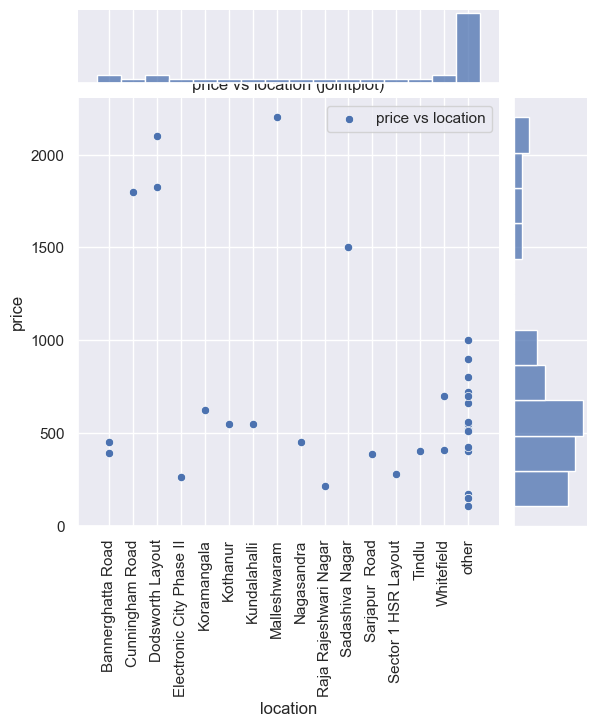

In [114]:
palette = sns.color_palette("Set1", n_colors=4)
sns.jointplot(x = 'location', y='price' ,label = 'price vs location', palette=palette,data=df3)
plt.xticks(rotation=90)
plt.title('price vs location (jointplot)')
plt.show()

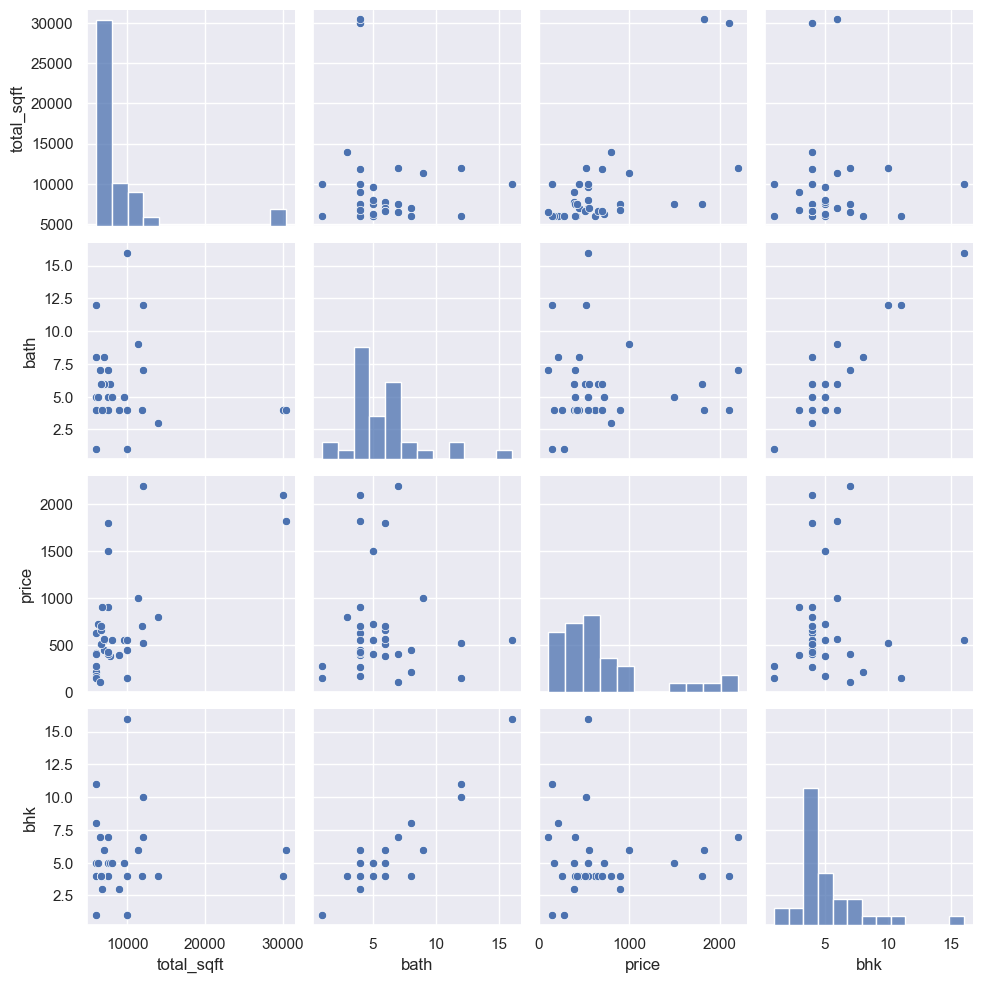

In [115]:
sns.pairplot(df3)

In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
model_kneighbour = KNeighborsRegressor(n_neighbors=5)

In [118]:
ohe = OneHotEncoder()
ohe.fit(X[['location']])
ohe.categories_

[array(['1st Block Jayanagar', '1st Block Koramangala',
        '1st Phase JP Nagar', '2nd Phase Judicial Layout',
        '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
        '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
        '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout',
        'Abbigere', 'Akshaya Nagar', 'Ambalipura', 'Ambedkar Nagar',
        'Amruthahalli', 'Anandapura', 'Ananth Nagar', 'Anekal',
        'Anjanapura', 'Ardendale', 'Arekere', 'Attibele', 'BEML Layout',
        'BTM 1st Stage', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
        'Badavala Nagar', 'Balagere', 'Banashankari',
        'Banashankari Stage II', 'Banashankari Stage III',
        'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
        'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road', 'Basapura',
        'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
        'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
        'Bhoga

In [119]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['location']),
                                    remainder='passthrough')
pipe_kneighbour = make_pipeline(column_trans,model_kneighbour)

In [120]:
pipe_kneighbour

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase...
       'Thubarahalli', 'Thyagaraja Nagar', 'Tindlu', 'Tumkur Road',
       'Ulsoor', 'Uttarahalli', 'Varthur', 'Varthur Road', 'Vasanthapura',
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'other'], dtype=object)]),
                                                  ['location'])])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [121]:
pipe_kneighbour.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase...
       'Thubarahalli', 'Thyagaraja Nagar', 'Tindlu', 'Tumkur Road',
       'Ulsoor', 'Uttarahalli', 'Varthur', 'Varthur Road', 'Vasanthapura',
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'other'], dtype=object)]),
                                                  ['location'])])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [122]:
y_pred_kneighbour = pipe_kneighbour.predict(X_test)

In [123]:
y_pred_kneighbour

array([ 55.42,  63.2 ,  65.2 , ...,  59.8 , 116.  , 120.2 ])

In [124]:
r2_score(y_test,y_pred_kneighbour)
print(r2_score(y_test,y_pred_kneighbour))
print(mean_absolute_error(y_test,y_pred_kneighbour))
print(mean_squared_error(y_test,y_pred_kneighbour))

0.6259001066556743
23.163291501976286
3055.1115639387353


In [125]:
model_randomforestregressor=RandomForestRegressor(n_estimators=100, random_state=42)

In [126]:
pipe_randomforestregressor = make_pipeline(column_trans,model_randomforestregressor)

In [127]:
pipe_randomforestregressor

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase...
       'Thubarahalli', 'Thyagaraja Nagar', 'Tindlu', 'Tumkur Road',
       'Ulsoor', 'Uttarahalli', 'Varthur', 'Varthur Road', 'Vasanthapura',
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'other'], dtype=object)]),
                                                  ['location'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [128]:
pipe_randomforestregressor.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase...
       'Thubarahalli', 'Thyagaraja Nagar', 'Tindlu', 'Tumkur Road',
       'Ulsoor', 'Uttarahalli', 'Varthur', 'Varthur Road', 'Vasanthapura',
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'other'], dtype=object)]),
                                                  ['location'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [129]:
y_pred_randomforestregressor = pipe_randomforestregressor.predict(X_test)

In [130]:
y_pred_randomforestregressor

array([ 51.9601593 ,  56.66338542,  55.75805703, ...,  66.77646078,
       128.215     , 123.52505   ])

In [131]:
r2_score(y_test,y_pred_randomforestregressor)

0.6859881220464823

In [132]:
model_svr=SVR(kernel='rbf')

In [133]:
pipe_model_svr = make_pipeline(column_trans,model_svr)

In [134]:
pipe_model_svr

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase...
       'Thubarahalli', 'Thyagaraja Nagar', 'Tindlu', 'Tumkur Road',
       'Ulsoor', 'Uttarahalli', 'Varthur', 'Varthur Road', 'Vasanthapura',
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'other'], dtype=object)]),
                                                  ['location'])])),
                ('svr', SVR())])

In [135]:
pipe_model_svr.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase...
       'Thubarahalli', 'Thyagaraja Nagar', 'Tindlu', 'Tumkur Road',
       'Ulsoor', 'Uttarahalli', 'Varthur', 'Varthur Road', 'Vasanthapura',
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'other'], dtype=object)]),
                                                  ['location'])])),
                ('svr', SVR())])

In [136]:
y_pred_model_svr = pipe_model_svr.predict(X_test)

In [137]:
y_pred_model_svr

array([ 61.20763167,  61.35121059,  56.3076962 , ...,  57.71507982,
       114.28442172, 124.11624225])

In [138]:
r2_score(y_test,y_pred_model_svr)
print(r2_score(y_test,y_pred_model_svr))
print(mean_absolute_error(y_test,y_pred_model_svr))
print(mean_squared_error(y_test,y_pred_model_svr))


0.46533339248006167
24.420958589805345
4366.390273152514


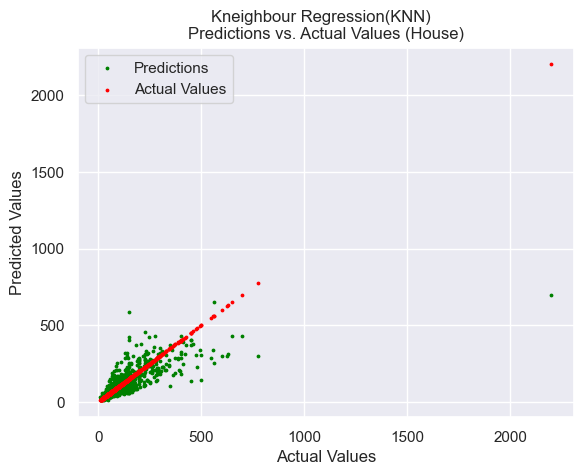

In [139]:
plt.scatter(y_test, y_pred_kneighbour, color='green', label='Predictions',s=3)
plt.scatter(y_test, y_test, color='red', label='Actual Values',s=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Kneighbour Regression(KNN)  \nPredictions vs. Actual Values (House)')
plt.legend()
plt.show()

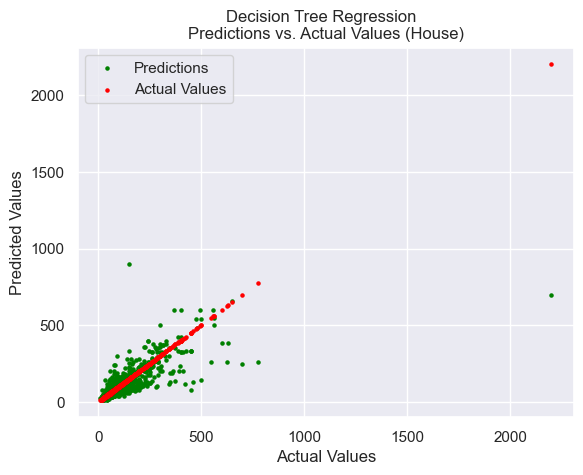

In [140]:
plt.scatter(y_test, y_pred_decision_tree, color='green', label='Predictions',s=5)
plt.scatter(y_test, y_test, color='red', label='Actual Values',s=5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regression  \nPredictions vs. Actual Values (House)')
plt.legend()
plt.show()

In [141]:
scaler = StandardScaler(with_mean=False)

In [142]:
from sklearn.ensemble import AdaBoostRegressor
ada_boost = AdaBoostRegressor()
ada_boost


AdaBoostRegressor()

In [143]:
pipe_ada_boost = make_pipeline(column_trans,scaler,ada_boost)

In [144]:
pipe_ada_boost.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase...
       'Ulsoor', 'Uttarahalli', 'Varthur', 'Varthur Road', 'Vasanthapura',
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'other'], dtype=object)]),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('adaboostregressor', AdaBoostRegressor())])

In [145]:
y_pred_ada = pipe_ada_boost.predict(X_test)

In [146]:
y_pred_ada

array([107.36548872,  96.95905572,  96.95905572, ...,  96.95905572,
       128.64600143, 128.64600143])

In [147]:
print(r2_score(y_test,y_pred_ada))
print(mean_absolute_error(y_test,y_pred_ada))
print(mean_squared_error(y_test,y_pred_ada))

0.39494379715854766
49.64544384221267
4941.231566811459


In [148]:
#applying ada boost regressor
from sklearn.ensemble import AdaBoostRegressor
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=100, random_state=42)
ada_boost

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=100, random_state=42)

In [149]:
pipe_ada_boost = make_pipeline(column_trans,scaler,ada_boost)

In [150]:
pipe_ada_boost

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase...
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'other'], dtype=object)]),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('adaboostregressor',
                 AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                                   n_estimators=100, random_state=42))])

In [151]:
pipe_ada_boost.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase...
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'other'], dtype=object)]),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('adaboostregressor',
                 AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                                   n_estimators=100, random_state=42))])

In [152]:
y_pred_ada_boost = pipe_ada_boost.predict(X_test)

In [153]:
y_pred_ada_boost

array([ 75.03527426,  70.94851329,  67.9243484 , ...,  70.94851329,
       122.80635308, 122.80635308])

In [154]:
print(r2_score(y_test,y_pred_ada_boost))
print(mean_absolute_error(y_test,y_pred_ada_boost))
print(mean_squared_error(y_test,y_pred_ada_boost))

0.586881059390315
30.44015072029899
3373.7631985291555


In [155]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr_regressor

GradientBoostingRegressor(random_state=42)

In [156]:
pipe_gbr_regressor = make_pipeline(column_trans,scaler,gbr_regressor)

In [157]:
pipe_gbr_regressor

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase...
       'Ulsoor', 'Uttarahalli', 'Varthur', 'Varthur Road', 'Vasanthapura',
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'other'], dtype=object)]),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=42))])

In [158]:
pipe_gbr_regressor.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase...
       'Ulsoor', 'Uttarahalli', 'Varthur', 'Varthur Road', 'Vasanthapura',
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'other'], dtype=object)]),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=42))])

In [159]:
y_pred_gbr_regressor = pipe_gbr_regressor.predict(X_test)

In [160]:
y_pred_gbr_regressor

array([ 66.71078713,  63.61781193,  57.17661343, ...,  68.11030197,
       118.07432638, 121.04124195])

In [161]:
print(r2_score(y_test,y_pred_gbr_regressor))
print(mean_absolute_error(y_test,y_pred_gbr_regressor))
print(mean_squared_error(y_test,y_pred_gbr_regressor))

0.7077902659375543
20.688778053672632
2386.350152759757


In [162]:
##applying bagging regressor
from sklearn.ensemble import BaggingRegressor
base_model = DecisionTreeRegressor(max_depth=5)
bagging_regressor = BaggingRegressor()
bagging_regressor.estimators_ = [base_model]

In [163]:
bagging_regressor

BaggingRegressor()

In [164]:
pipe_bagging_regressor = make_pipeline(column_trans,scaler,bagging_regressor)

In [165]:
pipe_bagging_regressor

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase...
       'Ulsoor', 'Uttarahalli', 'Varthur', 'Varthur Road', 'Vasanthapura',
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'other'], dtype=object)]),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('baggingregressor', BaggingRegressor())])

In [166]:
pipe_bagging_regressor.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase...
       'Ulsoor', 'Uttarahalli', 'Varthur', 'Varthur Road', 'Vasanthapura',
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'other'], dtype=object)]),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('baggingregressor', BaggingRegressor())])

In [167]:
y_pred_bagging_regressor = pipe_bagging_regressor.predict(X_test)

In [168]:
y_pred_bagging_regressor

array([ 48.26      ,  58.51957143,  59.76181818, ...,  65.12360358,
       130.33333333, 118.936     ])

In [169]:
print(r2_score(y_test,y_pred_bagging_regressor))
print(mean_absolute_error(y_test,y_pred_bagging_regressor))
print(mean_squared_error(y_test,y_pred_bagging_regressor))

0.6715275524548456
18.410548702045638
2682.4920049009743


In [170]:
from sklearn.ensemble import ExtraTreesRegressor
ExtraTreesRegressor = ExtraTreesRegressor()
pipe_ExtraTreesRegressor = make_pipeline(column_trans,scaler,ExtraTreesRegressor)

pipe_ExtraTreesRegressor


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase...
       'Ulsoor', 'Uttarahalli', 'Varthur', 'Varthur Road', 'Vasanthapura',
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'other'], dtype=object)]),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('extratreesregressor', ExtraTreesRegressor())])

In [171]:
pipe_ExtraTreesRegressor.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase...
       'Ulsoor', 'Uttarahalli', 'Varthur', 'Varthur Road', 'Vasanthapura',
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'other'], dtype=object)]),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('extratreesregressor', ExtraTreesRegressor())])

In [172]:
y_pre_ExtraTreesRegressor = pipe_ExtraTreesRegressor.predict(X_test)

In [173]:
y_pre_ExtraTreesRegressor

array([ 54.87787179,  59.727     ,  54.183     , ...,  67.038     ,
       130.        , 113.4109    ])

In [174]:
print(r2_score(y_test,y_pre_ExtraTreesRegressor))
print(mean_absolute_error(y_test,y_pre_ExtraTreesRegressor))
print(mean_squared_error(y_test,y_pre_ExtraTreesRegressor))

0.6884030470679408
18.186574671740495
2544.677160104427


In [175]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
pipe_RandomForestRegressor = make_pipeline(column_trans,scaler,RandomForestRegressor)

pipe_RandomForestRegressor


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase...
       'Ulsoor', 'Uttarahalli', 'Varthur', 'Varthur Road', 'Vasanthapura',
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'other'], dtype=object)]),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('randomforestregressor', RandomForestRegressor())])

In [176]:
pipe_RandomForestRegressor.fit(X_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase...
       'Ulsoor', 'Uttarahalli', 'Varthur', 'Varthur Road', 'Vasanthapura',
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'other'], dtype=object)]),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('randomforestregressor', RandomForestRegressor())])

In [177]:
y_pred_RandomForestRegressor = pipe_RandomForestRegressor.predict(X_test)

In [178]:
y_pred_RandomForestRegressor

array([ 50.95203518,  59.30211111,  55.91642756, ...,  67.57271545,
       129.13666667, 121.87805222])

In [179]:
print(r2_score(y_test,y_pred_RandomForestRegressor))
print(mean_absolute_error(y_test,y_pred_RandomForestRegressor))
print(mean_squared_error(y_test,y_pred_RandomForestRegressor))

0.6870111344476381
17.964853551101243
2556.0443067354076


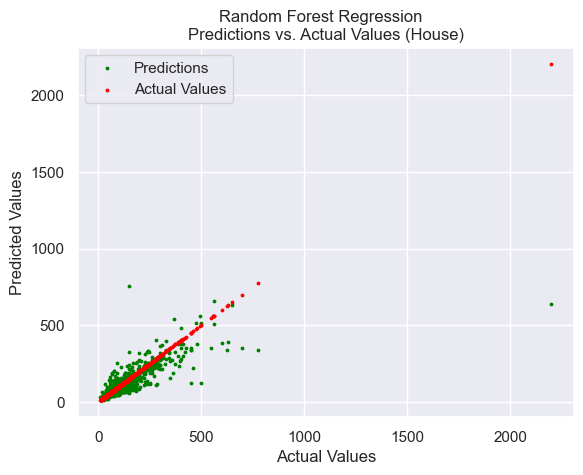

In [232]:
plt.scatter(y_test, y_pred_randomforestregressor, color='green', label='Predictions',s=3)
plt.scatter(y_test, y_test, color='red', label='Actual Values',s=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression  \nPredictions vs. Actual Values (House)')
plt.legend()
plt.show()

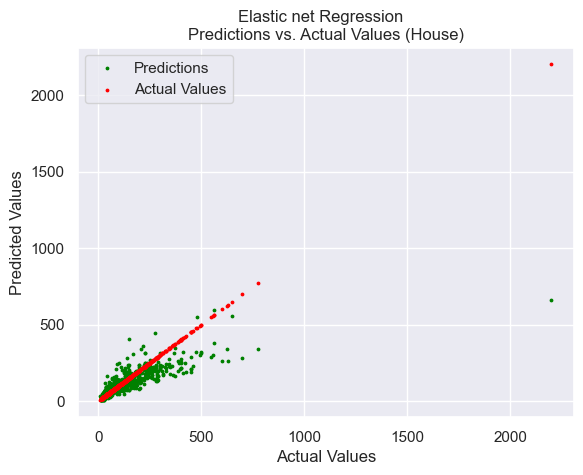

In [233]:
plt.scatter(y_test, y_pred_elastic, color='green', label='Predictions',s=3)
plt.scatter(y_test, y_test, color='red', label='Actual Values',s=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Elastic net Regression  \nPredictions vs. Actual Values (House)')
plt.legend()
plt.show()

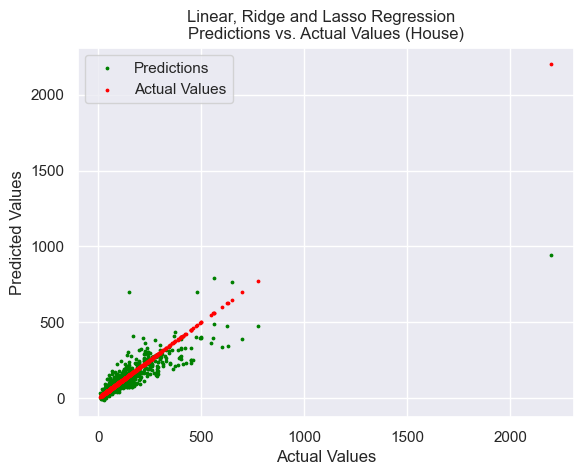

In [180]:
plt.scatter(y_test, y_pred_lr, color='green', label='Predictions',s=3)
plt.scatter(y_test, y_test, color='red', label='Actual Values',s=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear, Ridge and Lasso Regression  \nPredictions vs. Actual Values (House)')
plt.legend()
plt.show()

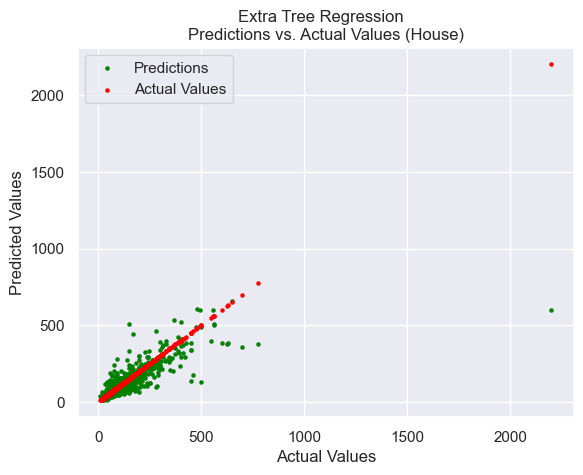

In [181]:
plt.scatter(y_test, y_pre_ExtraTreesRegressor, color='green', label='Predictions', s=5)
plt.scatter(y_test, y_test, color='red', label='Actual Values', s=5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Extra Tree Regression  \nPredictions vs. Actual Values (House)')
plt.legend()
plt.show()

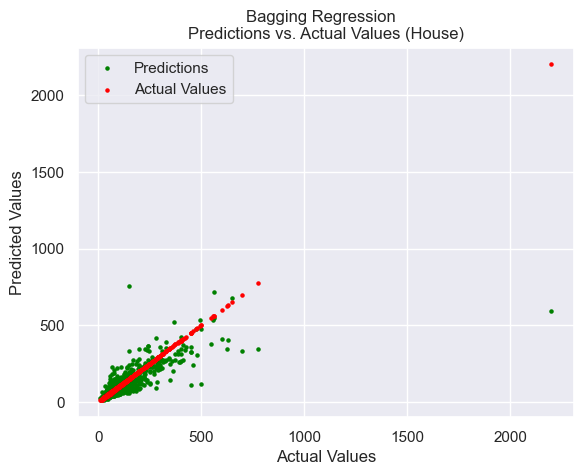

In [182]:
plt.scatter(y_test, y_pred_bagging_regressor, color='green', label='Predictions', s=5)
plt.scatter(y_test, y_test, color='red', label='Actual Values', s=5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Bagging Regression  \nPredictions vs. Actual Values (House)')
plt.legend()
plt.show()

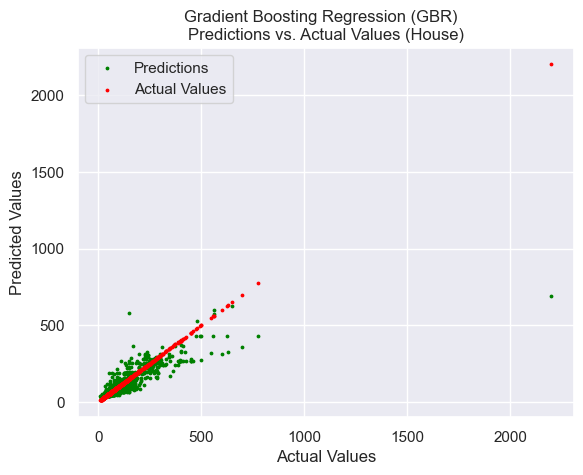

In [183]:
plt.scatter(y_test, y_pred_gbr_regressor, color='green', label='Predictions', s=3)
plt.scatter(y_test, y_test, color='red', label='Actual Values', s=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting Regression (GBR)  \nPredictions vs. Actual Values (House)')
plt.legend()
plt.show()

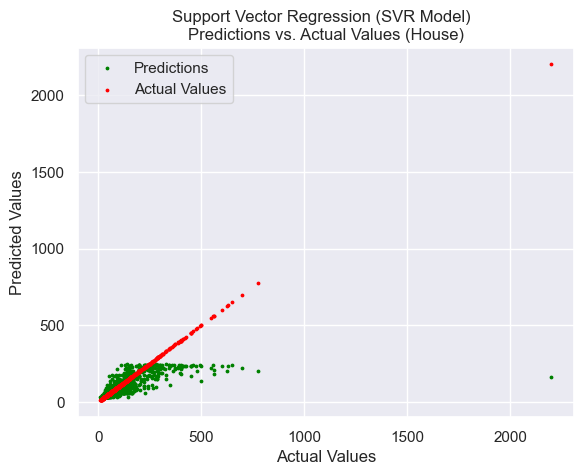

In [184]:
plt.scatter(y_test, y_pred_model_svr, color='green', label='Predictions', s=3)
plt.scatter(y_test, y_test, color='red', label='Actual Values', s=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Support Vector Regression (SVR Model)  \nPredictions vs. Actual Values (House)')
plt.legend()
plt.show()

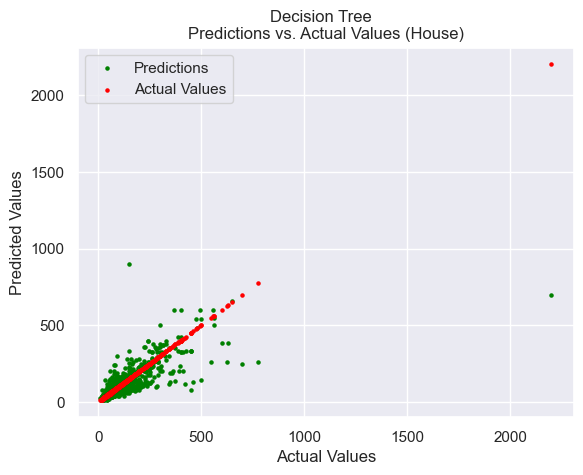

In [185]:
plt.scatter(y_test, y_pred_decision_tree, color='green', label='Predictions', s=5)
plt.scatter(y_test, y_test, color='red', label='Actual Values', s=5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree  \nPredictions vs. Actual Values (House)')
plt.legend()
plt.show()

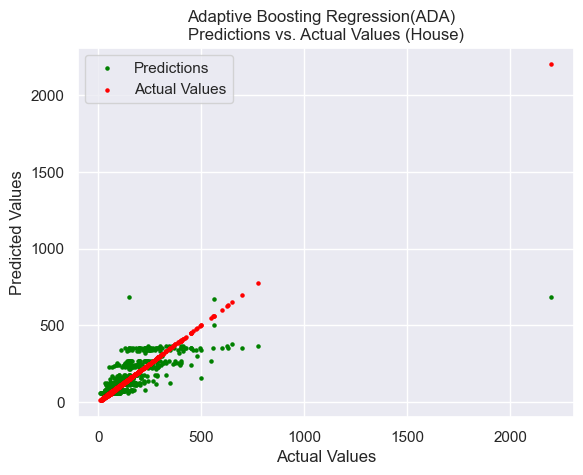

In [186]:
plt.scatter(y_test, y_pred_ada_boost, color='green', label='Predictions', s=5)
plt.scatter(y_test, y_test, color='red', label='Actual Values', s=5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Adaptive Boosting Regression(ADA)  \nPredictions vs. Actual Values (House)')
plt.legend() 
plt.show()

In [187]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreeRegressor = DecisionTreeRegressor()
pipe_decision = make_pipeline(column_trans,scaler,DecisionTreeRegressor)
pipe_decision

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase...
       'Ulsoor', 'Uttarahalli', 'Varthur', 'Varthur Road', 'Vasanthapura',
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'other'], dtype=object)]),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [188]:
pipe_decision.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase...
       'Ulsoor', 'Uttarahalli', 'Varthur', 'Varthur Road', 'Vasanthapura',
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'other'], dtype=object)]),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [189]:
y_pred_decision = pipe_decision.predict(X_test)

In [190]:
y_pred_decision

array([ 50.38461538,  65.        ,  48.        , ...,  67.04      ,
       130.        ,  98.845     ])

In [191]:
print(r2_score(y_test,y_pred_decision))
print(mean_absolute_error(y_test,y_pred_decision))
print(mean_squared_error(y_test,y_pred_decision))

0.6155377689872704
20.634188319030635
3139.7362810354603


In [192]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 866 to 10089
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    36 non-null     object 
 1   total_sqft  36 non-null     float64
 2   bath        36 non-null     float64
 3   price       36 non-null     float64
 4   bhk         36 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 1.7+ KB


In [193]:
df3.describe()

,total_sqft,bath,price,bhk
count,36.000000,36.000000,36.000000,36.000000
mean,9222.750000,5.666667,690.527778,5.166667
std,5581.816409,2.947154,539.678819,2.730777
min,6000.000000,1.000000,104.000000,1.000000
25%,6425.000000,4.000000,397.500000,4.000000
50%,7500.000000,5.000000,550.000000,4.000000
75%,10000.000000,6.250000,740.000000,6.000000
max,30400.000000,16.000000,2200.000000,16.000000


In [194]:
print(df3.dtypes)

location       object
total_sqft    float64
bath          float64
price         float64
bhk             int64
dtype: object


In [195]:
numeric_columns = df3.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df3[numeric_columns].corr()

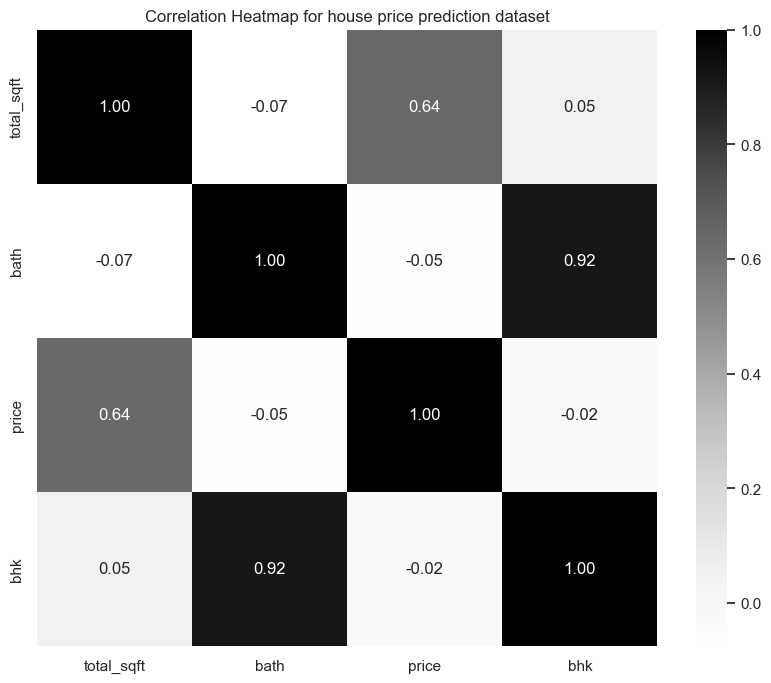

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your pandas DataFrame containing the dataset
# You may need to install seaborn if you haven't already: pip install seaborn

# Create a correlation matrix of your dataset
corr_matrix 

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,annot=True, cmap='Greys', fmt=".2f")
plt.title('Correlation Heatmap for house price prediction dataset')
plt.show()

In [197]:
mae = [
20.065995967490277,
20.066267450663073,
21.665101339653045,
23.870309815896352,
18.568892048502992,
18.083066263491578,
18.220293470298174,
20.688778053672632,
30.44015072029899,
24.420958589805345, 
20.89754882627701,
23.163291501976286,
]
mse = [
2126.081265438533,
2126.276929930864,
2224.1713318273887, 
2906.6169460472706,
2690.733553937442,
2675.5980884972287, 
2483.954234437474,
2386.350152759757,
3373.7631985291555, 
4366.390273152514,
3620.5739813524897,
3055.1115639387353,
]

In [198]:
def normalize_to_percentage(values):
    max_value = max(values)
    return [(value / max_value) * 100 for value in values]

# Step 3: Normalize MAE and MSE values to percentages
mae_percentage = normalize_to_percentage(mae)
mse_percentage = normalize_to_percentage(mse)

# Step 4: Print the normalized values
print("Normalized MAE (Percentage):", mae_percentage)
print("Normalized MSE (Percentage):", mse_percentage)

Normalized MAE (Percentage): [65.91950267220354, 65.92039453103594, 71.17277946066703, 78.41718667962591, 61.0013144124163, 59.40531119457598, 59.85612107415744, 67.9654258080803, 100.0, 80.22614215743764, 68.65126594902664, 76.09453617629384]
Normalized MSE (Percentage): [48.69196595895474, 48.696447108831194, 50.93844555084965, 66.56796035661526, 61.623752931153916, 61.27711727805446, 56.8880489156108, 54.65269944907657, 77.2666433248834, 100.0, 82.91915643945524, 69.96881572230507]


In [199]:
def normalize_values(values):
    max_value = max(values)
    min_value = min(values)
    normalized_values = [(value - min_value) / (max_value - min_value) for value in values]
    return normalized_values

# Normalize MAE and MSE values
normalized_mae = normalize_values(mae)
normalized_mse = normalize_values(mse)

print("Normalized MAE:", normalized_mae)
print("Normalized MSE:", normalized_mse)

Normalized MAE: [0.1604690581285394, 0.16049102796889655, 0.2898770408733554, 0.468334061536387, 0.03931556725290301, 0.0, 0.011105144363644674, 0.21086784664206043, 1.0, 0.5128954445902711, 0.22776267109147721, 0.41111843624942246]
Normalized MSE: [0.0, 8.733817150088748e-05, 0.04378416818889954, 0.34840536636738284, 0.25204214532667624, 0.24528617309780154, 0.15974268182053855, 0.11617544116684286, 0.5569240353873153, 1.0, 0.667092222888905, 0.4146884627528182]


In [200]:
X_train.head()

,location,total_sqft,bath,bhk
9567,other,1675.0,3.0,3
460,Anekal,1200.0,1.0,2
8514,other,1750.0,3.0,3
1116,Bellandur,924.0,2.0,2
8732,other,2600.0,3.0,3


In [201]:
import matplotlib.pyplot as plt

In [202]:
techniques = ['Linear Regression','Ridge Regression','Lasso Regression','Elasticnet Regression','Bagging Regression','Random Forest Regression','Extra Trees Regression','Gradient Boosting Regression','Adaptive Boosting Regression (ADA)','Support Vector Regression (SVR)','Decision Tree Regression','K-Neighbors Regression']
r2_scores_1 = [94.47,94.47,94.47,85.99,97.51,97.7,97.60,97.13,67.46,65.67,95.71,96.83]
r2_scores_2 = [
87.60,
87.624,
84.03,
86.73,
85.18,
85.18,
92.05,
84.96,
31.72,
-11.08,
80.16,
49.83,
]
r2_scores_3 = [
73.96,
73.96,
72.76,
64.40,
67.05,
67.23,
69.58,
70.77,
58.68,
46.53,
55.66,
62.59,
]


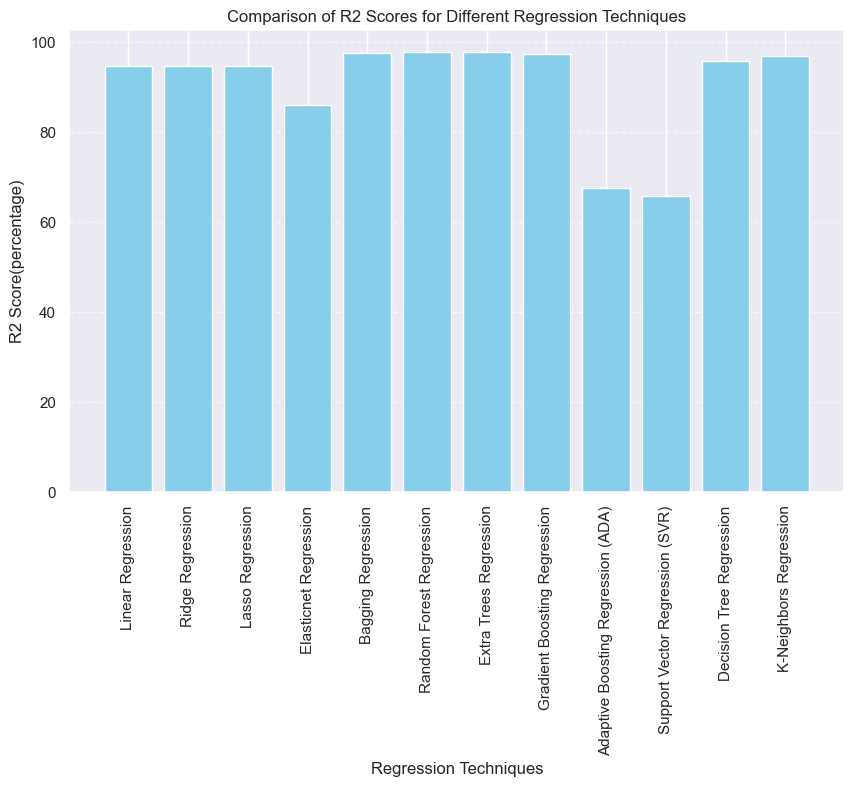

In [203]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(techniques, r2_scores_1, color='skyblue')  # Create the bar plot
plt.xlabel('Regression Techniques')  # Set the label for the x-axis
plt.xticks(rotation=90)
plt.ylabel('R2 Score(percentage)')  # Set the label for the y-axis
plt.title('Comparison of R2 Scores for Different Regression Techniques')  # Set the title
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.show()  # Show the plot

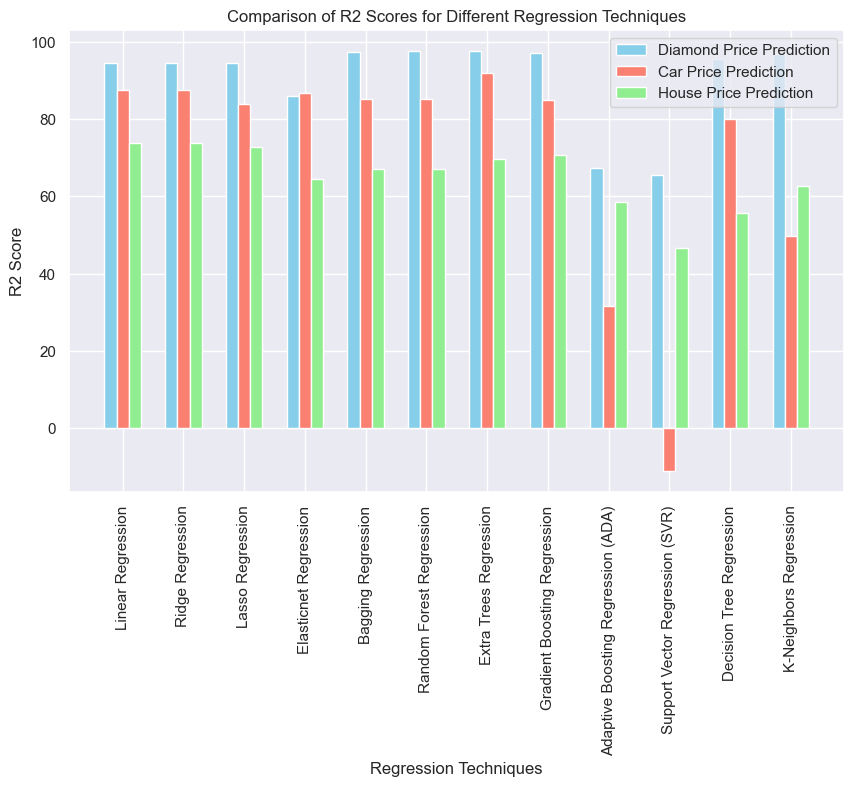

In [204]:
bar_width = 0.2

# Set the position of the bars on the x-axis
r1 = np.arange(len(techniques))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting the bars
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(r1, r2_scores_1, color='skyblue', width=bar_width, label='Diamond Price Prediction')
plt.bar(r2, r2_scores_2, color='salmon', width=bar_width, label='Car Price Prediction')
plt.bar(r3, r2_scores_3, color='lightgreen', width=bar_width, label='House Price Prediction')

# Adding labels and title
plt.xlabel('Regression Techniques')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Scores for Different Regression Techniques')
plt.xticks([r + bar_width for r in range(len(techniques))], techniques)
plt.xticks(rotation=90)
# Adding legend
plt.legend()

# Show plot
plt.show()

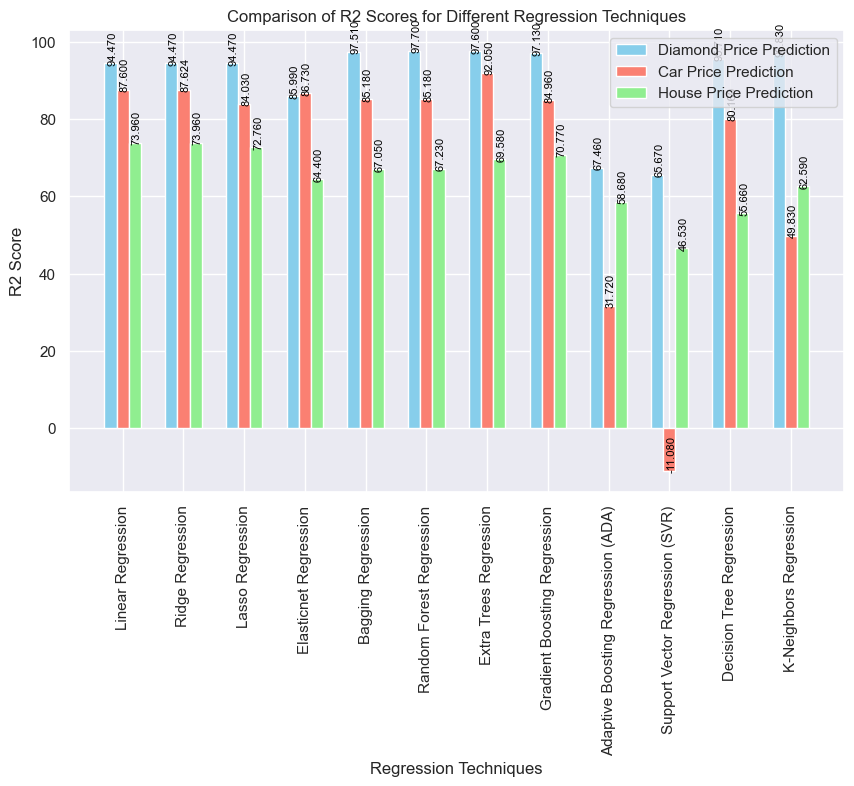

In [205]:
bar_width = 0.2

# Set the position of the bars on the x-axis
r1 = np.arange(len(techniques))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting the bars
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(r1, r2_scores_1, color='skyblue', width=bar_width, label='Diamond Price Prediction')
plt.bar(r2, r2_scores_2, color='salmon', width=bar_width, label='Car Price Prediction')
plt.bar(r3, r2_scores_3, color='lightgreen', width=bar_width, label='House Price Prediction')

# Adding labels and title
plt.xlabel('Regression Techniques')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Scores for Different Regression Techniques')
plt.xticks([r + bar_width for r in range(len(techniques))], techniques)
plt.xticks(rotation=90)

# Adding values on top of each bar
for i in range(len(techniques)):
    plt.text(x=r1[i] - 0.05, y=r2_scores_1[i] + 0.01, s=f'{r2_scores_1[i]:.3f}', color='black',rotation=90,fontsize=8)
    plt.text(x=r2[i] - 0.05, y=r2_scores_2[i] + 0.01, s=f'{r2_scores_2[i]:.3f}', color='black',rotation=90,fontsize=8)
    plt.text(x=r3[i] - 0.05, y=r2_scores_3[i] + 0.01, s=f'{r2_scores_3[i]:.3f}', color='black',rotation=90,fontsize=8)

# Adding legend
plt.legend()

# Show plot
plt.show()

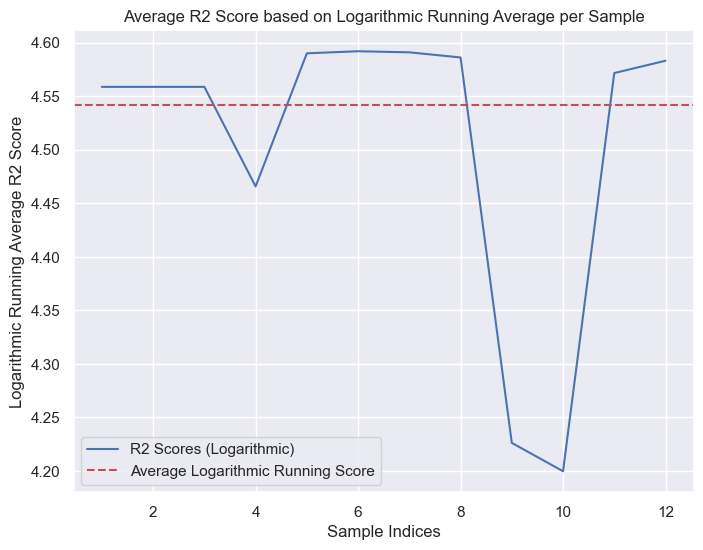

In [206]:
# Function to compute the average logarithmic running per sample
def average_log_running(r2_scores_1):
    running_average = 0
    log_running_averages = []
    for i, r2 in enumerate(r2_scores_1, start=1):
        running_average += (r2 - running_average) / i
        log_running_average = np.log1p(running_average)  # Apply log1p to avoid log(0)
        log_running_averages.append(log_running_average)
    return np.mean(log_running_averages)

# Example usage:
# Assuming r2_scores is a list/array of R2 scores for each sample
  # Sample R2 scores

# Compute average logarithmic running score
average_log_running_score = average_log_running(r2_scores_1)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(r2_scores_1) + 1), np.log1p(r2_scores_1), label='R2 Scores (Logarithmic)')
plt.axhline(y=average_log_running_score, color='r', linestyle='--', label='Average Logarithmic Running Score')
plt.xlabel('Sample Indices')
plt.ylabel('Logarithmic Running Average R2 Score')
plt.title('Average R2 Score based on Logarithmic Running Average per Sample')
plt.legend()
plt.grid(True)
plt.show()

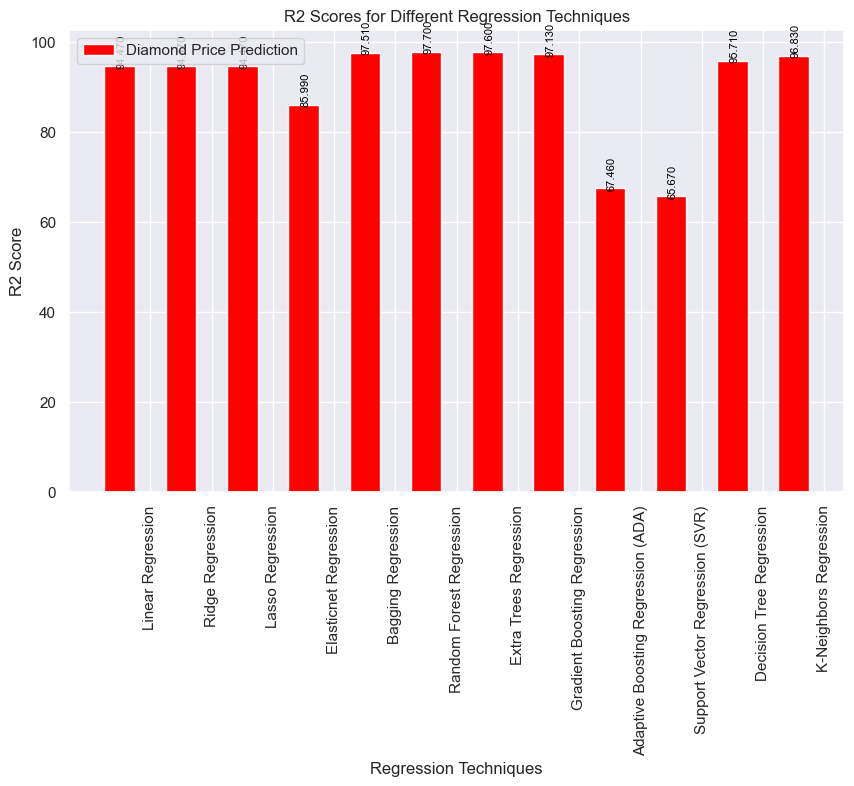

In [219]:
bar_width = 0.5

# Set the position of the bars on the x-axis
r1 = np.arange(len(techniques))
# r2 = [x + bar_width for x in r1]
# r3 = [x + bar_width for x in r2]

# Plotting the bars
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(r1, r2_scores_1, color='red', width=bar_width, label='Diamond Price Prediction')
# plt.bar(r2, r2_scores_2, color='salmon', width=bar_width, label='Car Price Prediction')
# plt.bar(r3, r2_scores_3, color='lightgreen', width=bar_width, label='House Price Prediction')

# Adding labels and title
plt.xlabel('Regression Techniques')
plt.ylabel('R2 Score')
plt.title('R2 Scores for Different Regression Techniques')
plt.xticks([r + bar_width for r in range(len(techniques))], techniques)
plt.xticks(rotation=90)

# Adding values on top of each bar
for i in range(len(techniques)):
    plt.text(x=r1[i] - 0.05, y=r2_scores_1[i] + 0.01, s=f'{r2_scores_1[i]:.3f}', color='black',rotation=90,fontsize=8)
    # plt.text(x=r2[i] - 0.05, y=r2_scores_2[i] + 0.01, s=f'{r2_scores_2[i]:.3f}', color='black',rotation=90,fontsize=8)
    # plt.text(x=r3[i] - 0.05, y=r2_scores_3[i] + 0.01, s=f'{r2_scores_3[i]:.3f}', color='black',rotation=90,fontsize=8)

# Adding legend
plt.legend()

# Show plot
plt.show()